In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import string
from nltk.corpus import stopwords
from Method import *
import nltk
nltk.download('stopwords')

# LDA
import numpy as np
import re
import spacy
import gensim
from gensim import corpora
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\PC\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(r"D:\\Reviews.csv")

In [3]:
data['Score'].value_counts() # -> Unbalanced Scores

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

# Preprocesing

In [4]:
# Clean text
df_sampled = preprocess_data(data)
df = df_sampled[['Text']]
df['Text'] = df['Text'].apply(preprocess_text)
df['Text'] 

C:\Users\PC\Extract-Marketing-Information-NLP-\Method\prep_pipeline.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_filtered_reviews.groupby('Score').apply(lambda x: x.sample(n=10000, random_state = 17)).reset_index(drop = True)


0        [love, anna, ginger, thin, cooky, hoping, find...
1        [dont, chocolate, bell, plantation, site, four...
2        [first, coffee, tried, keurig, disappointed, f...
3        [item, shipped, unsealed, plastic, within, bro...
4        [cat, picky, eater, sometime, found, weruvia, ...
                               ...                        
49995    [mother, love, product, heard, great, thing, a...
49996    [compared, favorite, breakfast, kashi, honey, ...
49997    [love, good, coffee, bought, keurig, lavazza, ...
49998    [bought, month, buying, popcorn, flavorful, de...
49999    [popchips, original, potato, chip, deelish, be...
Name: Text, Length: 50000, dtype: object

In [5]:
dictionary = corpora.Dictionary(df['Text'])
doc_term_matrix = [dictionary.doc2bow(rev) for rev in df['Text']]

In [6]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [7]:
lda_model.print_topics()

[(0,
  '0.093*"coffee" + 0.019*"flavor" + 0.016*"like" + 0.015*"taste" + 0.014*"good" + 0.013*"blend" + 0.013*"strong" + 0.011*"bean" + 0.009*"roast" + 0.008*"great"'),
 (1,
  '0.130*"food" + 0.026*"chicken" + 0.025*"cat" + 0.025*"sauce" + 0.019*"meal" + 0.015*"meat" + 0.015*"rice" + 0.015*"soup" + 0.011*"ingredient" + 0.011*"canned"'),
 (2,
  '0.014*"love" + 0.012*"like" + 0.012*"time" + 0.012*"treat" + 0.011*"product" + 0.009*"would" + 0.008*"great" + 0.008*"good" + 0.007*"dont" + 0.007*"year"'),
 (3,
  '0.067*"water" + 0.032*"bottle" + 0.017*"popcorn" + 0.014*"packet" + 0.013*"oatmeal" + 0.012*"drink" + 0.011*"powder" + 0.010*"drinking" + 0.009*"make" + 0.008*"container"'),
 (4,
  '0.029*"energy" + 0.015*"crunch" + 0.012*"blueberry" + 0.012*"berry" + 0.011*"warm" + 0.011*"garlic" + 0.010*"caffeine" + 0.010*"hooked" + 0.010*"morning" + 0.009*"slight"'),
 (5,
  '0.035*"amazon" + 0.028*"product" + 0.028*"price" + 0.024*"store" + 0.018*"order" + 0.015*"great" + 0.013*"find" + 0.012*"shi

In [8]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.233288 -0.015475       1        1  29.595252
9      0.242429  0.008794       2        1  23.961350
5      0.200791  0.024706       3        1  12.207399
0      0.185419 -0.059591       4        1   8.928002
7     -0.123395 -0.101051       5        1   5.308981
1     -0.106341  0.259175       6        1   5.291363
8     -0.145534  0.241952       7        1   5.044727
3     -0.150333 -0.240388       8        1   4.698785
4     -0.056768 -0.050675       9        1   2.916427
6     -0.279556 -0.067448      10        1   2.047713, topic_info=          Term          Freq         Total Category  logprob  loglift
117       food  13562.000000  13562.000000  Default  30.0000  30.0000
67      coffee  16443.000000  16443.000000  Default  29.0000  29.0000
79       taste  20978.000000  20978.000000  Default  28.0000  28.0000
45      flavor  18716.000000  18716.000000  Default  27.0000  27.0000
83       water   6203.000000   6203.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1404  pressure    195.240828    262.321869  Topic10  -5.3322   3.5931
1042     color    291.560940   1194.599089  Topic10  -4.9312   2.4781
1054    orange    264.160518    838.709605  Topic10  -5.0299   2.7331
368    quality    247.540655   3446.114758  Topic10  -5.0949   1.2550
157    organic    226.479994   3465.450421  Topic10  -5.1838   1.1605

[559 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
5612     10  0.992673    acai
1060      4  0.164132    acid
1060      7  0.834061    acid
5160      7  0.995319  acidic
6042      3  0.998018     add
...     ...       ...     ...
458       3  0.192592    year
458       4  0.043110    year
458       6  0.027688    year
458       9  0.029441    year
3779      3  0.998410  yogurt

[910 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 6, 1, 8, 2, 9, 4, 5, 7])

In [9]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Text'] , dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.904134048563254

Coherence Score:  0.43439001996676707


In [10]:


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [11]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=df['Text'], start=2, limit=50, step=1)

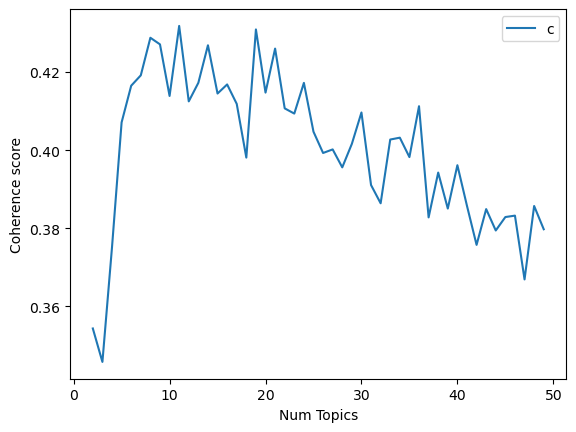

In [16]:
# Show graph
# limit=15; start=2; step=1
# x = range(start, limit, step)
x = range(2, len(coherence_values) + 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores


In [17]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3543
Num Topics = 3  has Coherence Value of 0.3457
Num Topics = 4  has Coherence Value of 0.3751
Num Topics = 5  has Coherence Value of 0.4071
Num Topics = 6  has Coherence Value of 0.4165
Num Topics = 7  has Coherence Value of 0.4192
Num Topics = 8  has Coherence Value of 0.4288
Num Topics = 9  has Coherence Value of 0.4271
Num Topics = 10  has Coherence Value of 0.4139
Num Topics = 11  has Coherence Value of 0.4318
Num Topics = 12  has Coherence Value of 0.4125
Num Topics = 13  has Coherence Value of 0.4173
Num Topics = 14  has Coherence Value of 0.4269
Num Topics = 15  has Coherence Value of 0.4145
Num Topics = 16  has Coherence Value of 0.4168
Num Topics = 17  has Coherence Value of 0.4119
Num Topics = 18  has Coherence Value of 0.3981
Num Topics = 19  has Coherence Value of 0.4309
Num Topics = 20  has Coherence Value of 0.4147
Num Topics = 21  has Coherence Value of 0.426
Num Topics = 22  has Coherence Value of 0.4107
Num Topics = 23  has C

In [22]:
# Select the model and print the topics
optimal_model = model_list[9]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.018*"product" + 0.007*"company" + 0.006*"plant" + 0.006*"great" + 0.005*"movie" + 0.005*"size" + 0.004*"never" + 0.004*"much" + 0.004*"tree" + 0.004*"bone"'),
 (1,
  '0.015*"good" + 0.014*"like" + 0.012*"great" + 0.009*"chip" + 0.009*"salt" + 0.009*"make" + 0.009*"really" + 0.007*"taste" + 0.007*"time" + 0.007*"size"'),
 (2,
  '0.018*"butter" + 0.016*"sauce" + 0.016*"food" + 0.015*"peanut" + 0.014*"like" + 0.013*"chicken" + 0.013*"cheese" + 0.011*"soup" + 0.010*"meal" + 0.010*"meat"'),
 (3,
  '0.020*"bar" + 0.019*"gluten" + 0.017*"snack" + 0.017*"fruit" + 0.017*"free" + 0.014*"juice" + 0.014*"product" + 0.013*"almond" + 0.012*"flavor" + 0.011*"vitamin"'),
 (4,
  '0.028*"bread" + 0.025*"banana" + 0.017*"subtle" + 0.013*"maple" + 0.012*"tangy" + 0.009*"eating" + 0.008*"reduce" + 0.007*"loaf" + 0.006*"food" + 0.006*"nutty"'),
 (5,
  '0.032*"taste" + 0.027*"like" + 0.025*"flavor" + 0.016*"good" + 0.011*"chocolate" + 0.011*"great" + 0.011*"sweet" + 0.011*"drink" + 0.010*"sugar" + 

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.086989 -0.096629       1        1  24.403815
1     -0.111408 -0.002518       2        1  13.733367
9     -0.061142  0.101081       3        1  13.207019
7     -0.121123  0.061416       4        1  12.984313
10    -0.138646 -0.041580       5        1   7.631542
8     -0.017003  0.032761       6        1   6.852276
6      0.166508 -0.072118       7        1   6.012518
2      0.010572 -0.067695       8        1   5.509634
0     -0.030846  0.124740       9        1   4.232649
3      0.133827 -0.215708      10        1   3.854618
4      0.256250  0.176250      11        1   1.578250, topic_info=         Term          Freq         Total Category  logprob  loglift
67     coffee  17231.000000  17231.000000  Default  30.0000  30.0000
117      food  14534.000000  14534.000000  Default  29.0000  29.0000
60      treat   6847.000000   6847.000000  Default  28.0000  28.0000
1      amazon   8536.000000   8536.000000  Default  27.0000  27.0000
45     flavor  19063.000000  19063.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3822    heart    154.763651    445.939275  Topic11  -5.3042   3.0906
231      diet    173.240888   2566.787165  Topic11  -5.1914   1.4531
117      food    201.643115  14534.677179  Topic11  -5.0396  -0.1289
312   serving    155.865640   1987.972334  Topic11  -5.2971   1.6030
843    always    148.213436   3884.214806  Topic11  -5.3474   0.8828

[885 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
14173      3  0.992982    5hour
5612       2  0.006227     acai
5612      10  0.230405     acai
5612      11  0.753486     acai
1060       2  0.008780     acid
...      ...       ...      ...
3779       1  0.981645   yogurt
3779       9  0.016279   yogurt
9889       3  0.988566  younger
6348       3  0.006162    zukes
6348       6  0.985984    zukes

[3123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 10, 8, 11, 9, 7, 3, 1, 4, 5])

In [25]:
# Select the model and print the topics
chosen_model = model_list[9]
model_topics = chosen_model.show_topics(formatted=False)

In [26]:
# Get topic distribution for each document
topic_dist_per_doc = []
for doc in doc_term_matrix:
    topic_dist = optimal_model.get_document_topics(doc, minimum_probability=0.0)
    topic_dist_per_doc.append(topic_dist)

# Assign documents to topics
assigned_topics = []
for doc_topics in topic_dist_per_doc:
    max_prob_topic = max(doc_topics, key=lambda x: x[1])
    assigned_topics.append(max_prob_topic[0])


In [28]:
df['Assigned_Topic'] = assigned_topics

In [38]:
df['Summary'] = data['Summary']

In [50]:
df['Rate'] = data['Score']

In [51]:
df

,Text,Assigned_Topic,Summary,Rate
0,"[love, anna, ginger, thin, cooky, hoping, find...",7,Good Quality Dog Food,5
1,"[dont, chocolate, bell, plantation, site, four...",5,Not as Advertised,1
2,"[first, coffee, tried, keurig, disappointed, f...",5,"""Delight"" says it all",4
3,"[item, shipped, unsealed, plastic, within, bro...",7,Cough Medicine,2
4,"[cat, picky, eater, sometime, found, weruvia, ...",7,Great taffy,5
...,...,...,...,...
49995,"[mother, love, product, heard, great, thing, a...",7,Grown to really like them,5
49996,"[compared, favorite, breakfast, kashi, honey, ...",3,Healthy Snack at a great price!,5
49997,"[love, good, coffee, bought, keurig, lavazza, ...",10,Raw Revolution Hazelnut Cashew,5
49998,"[bought, month, buying, popcorn, flavorful, de...",1,"fantastic, but chew carefully",4


In [55]:
average_rates = df.groupby('Assigned_Topic')[['Rate']].mean()

In [56]:
average_rates

,Rate
Assigned_Topic,
0,4.153326
1,4.105804
2,4.156993
3,4.085674
4,4.028986
5,4.153898
6,4.108087
7,4.141586
8,4.170923


In [63]:
df[df["Assigned_Topic"]==10]

,Text,Assigned_Topic,Summary,Rate
26,"[disappointed, half, good, lawrys, meatloaf, t...",10,Nasty No flavor,1
59,"[unless, like, flavorless, truck, stop, style,...",10,great deal.,5
64,"[swayed, high, review, roaster, subscription, ...",10,great source of electrolytes,5
83,"[description, mention, flavored, coffee, name,...",10,Natural Balance Lamb and Rice,3
95,"[looking, forward, nice, bold, coffee, extra, ...",10,Good healthy dog food,5
...,...,...,...,...
49954,"[need, drink, decaf, morning, larger, travel, ...",10,tasty but not messy!,5
49961,"[love, coffee, learned, instant, coffee, starb...",10,great taste,5
49963,"[organic, chocolate, dark, delicious, without,...",10,Raw Revolution bars,5
49965,"[good, fresh, ground, best, kcup, kona, defini...",10,This is the best chocolate bar!!!,5


In [52]:
# df.to_csv('D:\\topic_assigned.csv')

# Naming The Topic

# To test more 

- Text Vectorizing: Bert Model, Word2vec